## Importing Necessary Libaries and Explanation Why They Are Needed

In [105]:
# Neural Network libraries 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from keras.optimizers import Adam

# Dataframe Libraries 
import numpy as np
import random
import pandas as pd

# Libraries for Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Training, Testing, and Validation Splits Dataset
from sklearn.model_selection import train_test_split

# Model Selection and Hyperparameter Tuning Libraries 
import keras_tuner as kt 

# Model Performance Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Set a seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

### Explanation of new libraries

In [2]:
import os

The OS module in Python provides functions for interacting with the operating system which comes under python's standard utility modules. It is useful to allow functions to interact with the file system. In this particular project, it is needed allow access to the images in the dataset used. 

In [4]:
import zipfile

ZIP file format is a common archive and compression standard for files that are large in size. This module allows the user to create, read, write, append, and list a ZIP file. It can handle ZIP files up to 4 GB in size but it cannot create an encrypted file.

In [6]:
import shutil 

The shutil module allows the user to conduct high-level operations on files and collection of files. Functions are provided that support file ammendments. 

In [8]:
from PIL import Image

The pillow module adds imaging capabilities which provides fast image processing and representation.

## Dataset Information

The dataset chosen for this Convolutional Neural Network Project is the Multi-Cancer Dataset taken from the Kaggle Open Directory for datasets. This Multi-Cancer Dataset was published by a user named Obuli Sai Naren who is a Front-end Web Developer. He posted the dataset two months ago and it has a total of 130,000 images covering several cancer types such as Breast Cancer, Brain Cancer, Oral Cancer, Lymphoma, and Cervical Cancer just to name a few. 

Link to the dataset: https://www.kaggle.com/datasets/obulisainaren/multi-cancer/data 

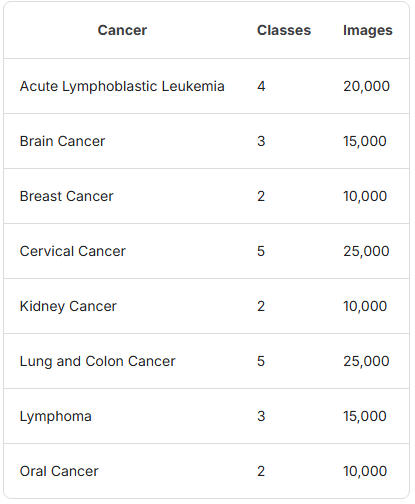

**Motivation**:

Cervical Cancer was chosen as this was the cancer type I explored when I used the Feed-forward Neural Network (FNN) architecture from the previous project. Cervical Cancer is a type of cancer that develops in the cervix itself or on the walls of the cervix. It happens when cells grow abnormally in the cervix and they change and form a tumor. In later stages, these cells can invade healthy tissues and other body parts which often leads to mortality. Being able to detect cervical cancer in its primary stages can definitely lower mortality risk for the individual. Image scans are important in this area because doctors and health officials can use image scans to diagnose what kind of cervical issue a patient has. According to the National Cancer Institute, the rate of cervical cancer was 7.6 per 100,000 people for women in particular. With a death rate of 2.2 women per 100,000. At the moment, there is an estimated of 297,245 women that live with cervical cancer in the United States of America. These statistics seem to suggest that the cancer is a growing problem and early screenings are important to mitigate its risks. This is where Convolutional Neural Network (CNN) architecture can help to identify signs of cervical cancer. Through the use of images, doctors can preemptively classify the cancer based on complex patterns. 

However, using CNN, it places great important on correct classifications. Within the context of health care, Type I and Type II error can be costly for patients. For example a Type II error, would mean that a person with cervical cancer is classified as not having it when they do. This can lead them to develop more serious complications and die. Whereas, Type I error can be financially costly for those who do not have the cancer but they are labeled as having it. Therefore, the best CNN architecture will be attempted to ensure that misclassifications are as low as possible. 

**Explanation of Cervical Cancer Subclasses**:

- `cancer_dyk` = **Dyskeratotic**: If there are Dyskeratotic cancer cells in a pap smear test, it usually indicates signs of precancerous or cancerous cells in the cervix as it is abnormal cell growth. 
- `cancer_koc` = **Koilcytotic**: Koilocytotic refers to when there are koilocytes presence within the cervix which is indicative of the human papillomavirus (HPV). When left untreated, these cells can lead to malignant tumors. 
- `cancer_pab` = **Parabasal**: These are immature cells in the cervix that are usually found in patients with low estrogen levels. They can become cancer. 
- `cancer_mep` = **Metaplastic**: Otherwise known as Squamous Metaplasia, it indicates a precancerous change in the cells that make up the tissue lining in the cervix. 
- `cancer_sfi` = **Superficial-Intermediate**: This indicates more mature squamous metaplasia cells which can lead to cancer.

Being able to classify a patient into one of these subclasses will enable them to get the correct treatment for whatever condition they have. Dyskeratotic is the most extreme as it usually requires more treatment like chemotherapy, surgery, or radiotherapy. Immature parabsal cells are usually not indicative of cancer but the patient can take steps to mitigate their risk. Hence, classification is very much key in this dataset.    

## Step 1: Select, download and organize the dataset into train, validation, and test folders

### Extracting the dataset

In [87]:
# Finding the path to the downloaded zipfile on my computer
file_path = 'C:/Users/techa/Downloads/Multi Cancer Dataset.zip'
extracted_path = 'C:/Users/techa/Desktop/Multi Cancer Dataset'

# Extracting the ZIP file 
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# List the extracted files
os.listdir(extracted_path)

['Multi Cancer', 'README.md']

In [14]:
dataset_path = 'C:/Users/techa/Desktop/Multi Cancer Dataset/Multi Cancer/Multi Cancer/Cervical Cancer'

In [16]:
# Defining the paths to the image categories
dyk_path = os.path.join(dataset_path, 'cervix_dyk')
koc_path = os.path.join(dataset_path, 'cervix_koc')
mep_path = os.path.join(dataset_path, 'cervix_mep')
pab_path = os.path.join(dataset_path, 'cervix_pab')
sfi_path = os.path.join(dataset_path, 'cervix_sfi')

# Counting the images in each folder
dyk_images = len(os.listdir(dyk_path))
koc_images = len(os.listdir(koc_path))
mep_images = len(os.listdir(mep_path))
pab_images = len(os.listdir(pab_path))
sfi_images = len(os.listdir(sfi_path))

# Printing the total number of images in benign and malignant
print(f"Total Dyskeratotic images: {dyk_images}")
print(f"Total Koilocytotic images: {koc_images}")
print(f"Total Metplastic images: {mep_images}")
print(f"Total Parabasal images: {pab_images}")
print(f"Total Superficial-Intermediate images {sfi_images}")

Total Dyskeratotic images: 5000
Total Koilocytotic images: 5000
Total Metplastic images: 5000
Total Parabasal images: 5000
Total Superficial-Intermediate images 5000


There are 5000 image scans for each class of the cervical cancer. 

### Showing a few images of the dataset

In [18]:
# Function to display multiple sample images from a category
def display_images(image_paths, title, num_samples= 3):
    plt.figure(figsize=(12, 4))
    for i in range(num_samples):
        img_path = image_paths[i]
        img = Image.open(img_path)  # Read the image
        img_rgb = img.convert('RGB')
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img_rgb)
        plt.title(f"{title} {i + 1}")
        plt.axis('off')
    plt.show()

# Get all image paths for each category
dyk_images_list = os.listdir(dyk_path)
koc_images_list = os.listdir(koc_path)
mep_images_list = os.listdir(mep_path)
pab_images_list = os.listdir(pab_path)
sfi_images_list = os.listdir(sfi_path)

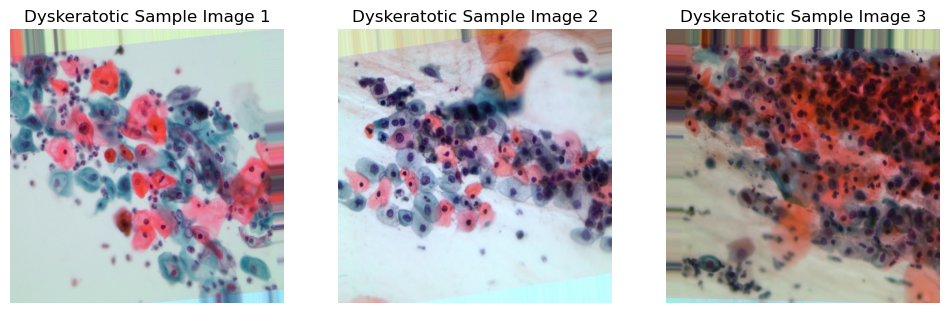

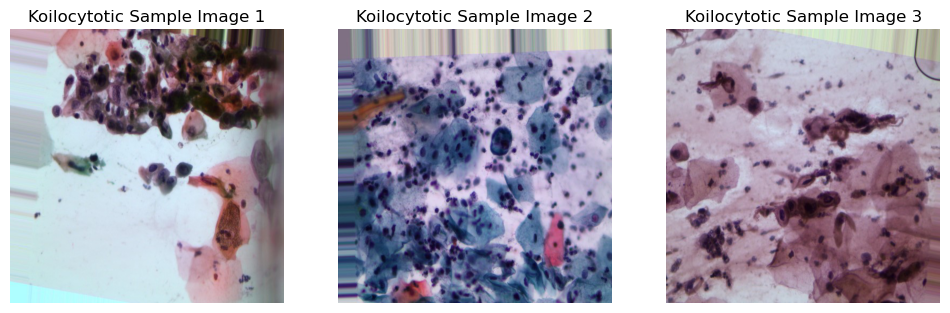

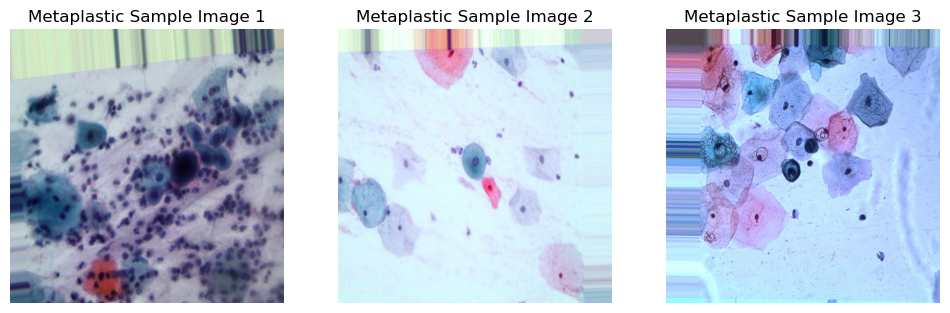

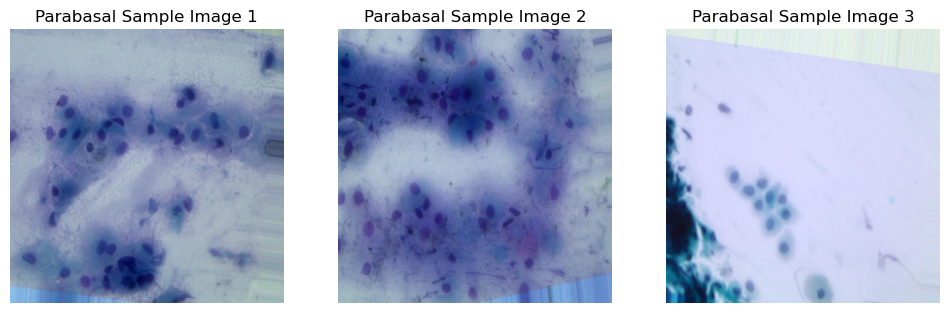

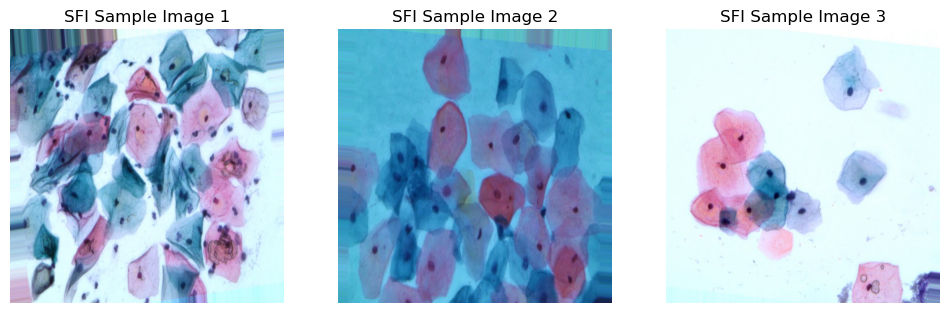

In [72]:
# Display 5 sample images from each category
display_images([os.path.join(dyk_path, img) for img in dyk_images_list[:3]], 'Dyskeratotic Sample Image')
display_images([os.path.join(koc_path, img) for img in koc_images_list[:3]], 'Koilocytotic Sample Image')
display_images([os.path.join(mep_path, img) for img in mep_images_list[:3]], 'Metaplastic Sample Image')
display_images([os.path.join(pab_path, img) for img in pab_images_list[:3]], 'Parabasal Sample Image')
display_images([os.path.join(sfi_path, img) for img in sfi_images_list[:3]], 'SFI Sample Image')

### Bringing all the images into one folder and turning the images into a dataframe

In [20]:
data_directory = 'C:/Users/techa/Desktop/Multi Cancer Dataset/Multi Cancer/Multi Cancer'
target_folder = 'Cervical Cancer'
filepath = []
labels = []
all_folder_path = os.path.join(data_directory, target_folder)

if os.path.isdir(all_folder_path):
    filelist = os.listdir(all_folder_path)
    for f in filelist:
        fpath = os.path.join(all_folder_path, f)
        fipath = os.listdir(fpath)
        for image in fipath:
            path = os.path.join(fpath, image)
            filepath.append(path)
            labels.append(f)

f_list = pd.Series(filepath, name = 'filepath')
l_list = pd.Series(labels, name = 'labels')

In [22]:
# Displaying the first few rows of the dataset
cancer_df = pd.concat([f_list, l_list], axis = 1)

cancer_df.head(10)

,filepath,labels
0,C:/Users/techa/Desktop/Multi Cancer Dataset/Mu...,cervix_dyk
1,C:/Users/techa/Desktop/Multi Cancer Dataset/Mu...,cervix_dyk
2,C:/Users/techa/Desktop/Multi Cancer Dataset/Mu...,cervix_dyk
3,C:/Users/techa/Desktop/Multi Cancer Dataset/Mu...,cervix_dyk
4,C:/Users/techa/Desktop/Multi Cancer Dataset/Mu...,cervix_dyk
5,C:/Users/techa/Desktop/Multi Cancer Dataset/Mu...,cervix_dyk
6,C:/Users/techa/Desktop/Multi Cancer Dataset/Mu...,cervix_dyk
7,C:/Users/techa/Desktop/Multi Cancer Dataset/Mu...,cervix_dyk
8,C:/Users/techa/Desktop/Multi Cancer Dataset/Mu...,cervix_dyk
9,C:/Users/techa/Desktop/Multi Cancer Dataset/Mu...,cervix_dyk


In [24]:
# Checking the data type
print(cancer_df.dtypes)

filepath    object
labels      object
dtype: object


In [26]:
#Checking for missing null values 
print(cancer_df.isnull().sum())

filepath    0
labels      0
dtype: int64


No missing values detected which means all the images are good to use

In [29]:
# Show dataset statistics
print(cancer_df.describe())

                                                 filepath      labels
count                                               25000       25000
unique                                              25000           5
top     C:/Users/techa/Desktop/Multi Cancer Dataset/Mu...  cervix_dyk
freq                                                    1        5000


In [31]:
# Number of each sample and it shows that the dataset is balanced
counts=cancer_df['labels'].value_counts()
counts

labels
cervix_dyk    5000
cervix_koc    5000
cervix_mep    5000
cervix_pab    5000
cervix_sfi    5000
Name: count, dtype: int64

C:\Users\techa\AppData\Local\Temp\ipykernel_23360\254420874.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index,y=counts.values,palette='viridis')


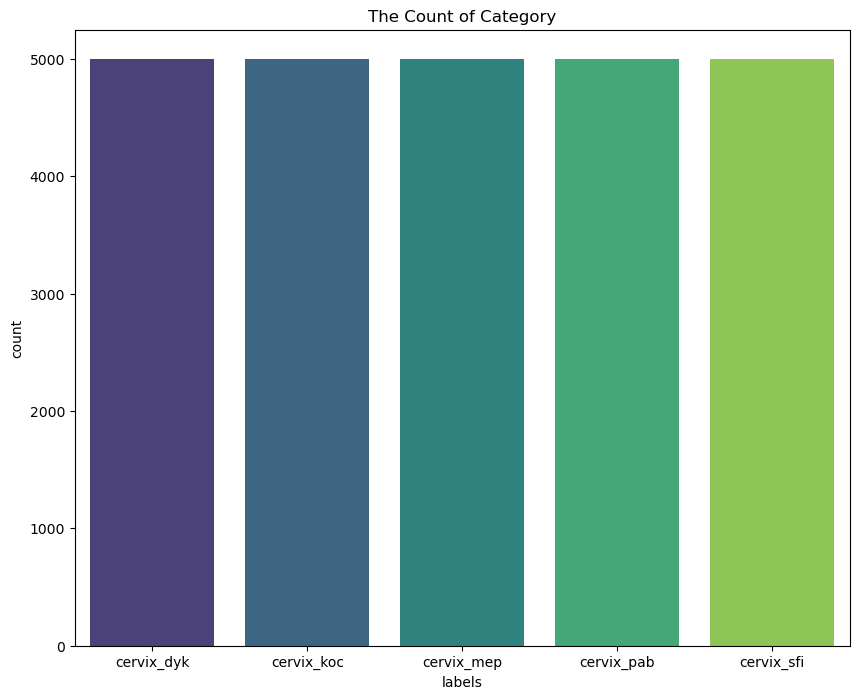

In [33]:
# Plotting the distribution of the labels
plt.figure(figsize=(10,8))
sns.barplot(x=counts.index,y=counts.values,palette='viridis')
plt.title('The Count of Category')
plt.xlabel('labels')
plt.ylabel('count')
plt.show()

As shown above, we can see that the dataset is balanced. With each class of cervical cancer having 5000 images each. By having a balanced dataset, this means that the CNN model will not be biased towards the majority class. This allows the model to learn effectively from all the classes and produce more accurate predictions across all the categories. Therefore, there is no need to use oversampling methods like SMOTE or undersampling methods as all the classes are already balanced. 

## Step 2: Select, download and organize the dataset into train, validation, and test folders

In [37]:
# This ensures that when the data is split, the distribution of the samples are evenly distributed and balanced
strat = cancer_df['labels']

train_set, temp_set = train_test_split(cancer_df, test_size = 0.2, random_state = 42, stratify = strat)

strat_2 = temp_set['labels']

test_set, val_set = train_test_split(temp_set, test_size = 0.5, random_state = 42, stratify = strat_2)

The dataset is split using a 80/10/10 split by using **`train_test_split`**. Now the dataset is split into training, testing, and validation sets. By using stratify, it ensures that the samples are evenly distributed. This is to ensure that no particular class of the cancer 

In [40]:
# Printing the shapes of the training, testing, and validation sets
print('The training set has the shape of', train_set.shape)
print('The testing set has the shape of', test_set.shape)
print('The validation set has the shape of', val_set.shape)

The training set has the shape of (20000, 2)
The testing set has the shape of (2500, 2)
The validation set has the shape of (2500, 2)


## Step 3: Preprocess the images:

This step aims to preprocess the cancer scans to a uniform size and validate if they can be used or not. Moreover, the training set, testing set, and validation set were 2D but Convolutional Neural Network expects a Here is an explanation of that is achieved:

In [44]:
# Resizing images to a uniform size of 128 x 128
img_size = (128, 128)
batch_size = 64

# 3 Channels of RGB representing 3 Different Colors
channels = 3

img_shape = (img_size[0], img_size[1], channels)

# Normalize pixel values between range [0, 1]
tr_gen = ImageDataGenerator(rescale = 1./255)
ts_gen = ImageDataGenerator(rescale = 1./255)

train_gen = tr_gen.flow_from_dataframe(train_set, x_col = 'filepath', y_col = 'labels', target_size = img_size, class_mode = 'categorical',
                                      color_mode = 'rgb', shuffle = True, batch_size = batch_size)

test_gen = ts_gen.flow_from_dataframe(test_set, x_col = 'filepath', y_col = 'labels', target_size = img_size, class_mode = 'categorical',
                                     color_mode = 'rgb', shuffle = False, batch_size = batch_size)

val_gen = ts_gen.flow_from_dataframe(val_set, x_col = 'filepath', y_col = 'labels', target_size = img_size, class_mode = 'categorical',
                                    color_mode = 'rgb', shuffle = True, batch_size = batch_size)

Found 20000 validated image filenames belonging to 5 classes.
Found 2500 validated image filenames belonging to 5 classes.
Found 2500 validated image filenames belonging to 5 classes.


In [46]:
# Printing the shapes of the training, testing, and validation sets
train_batch = next(train_gen)
test_batch = next(test_gen)
val_batch = next(val_gen)

print(f"Train data shape: {train_batch[0].shape}")
print(f"Train data labels: {train_batch[1].shape}")

print(f"Test data shape: {test_batch[0].shape}")
print(f"Test data labels: {test_batch[1].shape}")

print(f"Validation data shape: {val_batch[0].shape}")
print(f"Validation data labels: {val_batch[1].shape}")

Train data shape: (64, 128, 128, 3)
Train data labels: (64, 5)
Test data shape: (64, 128, 128, 3)
Test data labels: (64, 5)
Validation data shape: (64, 128, 128, 3)
Validation data labels: (64, 5)


## Step 4: Design and build the CNN models

### Rationalization of CNN Parameter Choices for CNN Architecture**:

**Conv2D Layer**:
The Conv2D layer uses a filter or a kernel that slides over the 2D input data. This layer is used to extract features from the input images. This is done by taking the dot product between the filter and the parts of the image which in this case with respect to the 128 x 128 image. The output is known as the Feature Map which gives information about the corners and edges of the image. They essentially ensure the spatial relationship between pixels are intact.

- **First Conv2D Layer**: Applies 32 filters each with the size of 3 x 3 to each input image. Afterwards, 32 channels is outputted from the feature extraction.
- **First Max Pooling Layer**: Performs max pooling with a pool size of 2 x 2 which means it divides the image into non-overlapping 2 x 2 blocks and takes the maximum value from each block. Max pooling helps reduce the sapatial relationship of feature maps and effectively downsample the image while retaining its important features. It also reduces the number of parameters and computations to avoid overfitting.
  
- **Second Conv2D Layer**: Applies 64 filters each with the size of 3 x 3 to the feature map that was produced by the First Conv2D layer. The number of filter is increased two fold to capture more complex features at a higher level. Each filter generates a new filter map of 64 channels. 
- **Second Max Pooling Layer**: Similarly, it performs max pooling with pool size of 2 x 2 to retain the important features generated by the new feature map.

- **Third Conv2D Layer**: Applied 128 filters each with the size of 3 x 3 to the feature map produced by the Second Conv2D layer. The number of filter is increased two fold again to capture more complex features at a new higher level. 
- **Third Max Pooling Layer**: Similarly, performs max pooling with pool size of 2 x 2 to retain the important features generated by the new feature map.

- **Flatten Layer**: This layer flattens the multi-dimensional output from both the convolutional and pooling layers into a one-dimensional vector. This is required because the Dense layer requires a 2D output and not a 3D output.

- **Dense Layer (Fully Connected Layer)**: Fully connected layer with 128 neurons with each neuron being connected to every output from the Flattened Third Conv2D layer. It will combined the learned features from previous layers and generate high level features used for classification.

- **Dropout Layer (0.5)**: The Dropout rate has a dropout rate of 50%. This randomly sets some of the functions to zero during training to prevent overfitting which places less reliance of the model on certain neurons.

- **Final Output Layer**: Has 5 neurons, one for each sub-class of cervical cancer.  

- **ReLu Function**: The ReLu activation function is used in each of the Conv2D Layer. It introduces non-linearity to help the model learn complex patterns and replaces negative values with zero. 

- **Softmax Function**: The softmax activation function is used for the final layer of the neural network as we are dealing with a multi-class classification. The softmax function converts the raw output scores (known as logits) into probabilities by exponentiating and normalizing these values by all output. What happens is that it outputs a probability distribution that is easily interpretable. The softmax function has the following equation:

- **Optimizer**: The Adaptive Moment Estimation algorithm (ADAM) was used to compute adaptive learning rates by using the first and second moments of the gradients. It changes the learning rates based on the mean and variance. The learning rate is fixed at 0.001 which is the default value. But the adaptive learning rate due to the second moment leads to faster convergence and usually better model performance.

- **Loss**: Categorical Cross Entropy because there are multi-classes prediction in this model. Measuring the difference between the true labels and the predicted labels (in this case being the cervical cancer types).

- **Metrics**: Accuracy so that the correct classifications are being prioritized as this is classification within the health domain and accuracy is an important metric to see if each cancer type is classified correctly. 

In [49]:
# Build the Sequential CNN Model
model_initial = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = img_shape),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation = 'relu', input_shape = img_shape),
    MaxPooling2D((2,2)),
    Conv2D(128, (3, 3), activation = 'relu', input_shape = img_shape),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(5, activation = 'softmax')
])

C:\Users\techa\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# Compiling the model
model_initial.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

## Step 5: Train the model on the training set and tune it using the validation set.

In [54]:
history_initial = model_initial.fit(
    train_gen, epochs = 30, validation_data = val_gen)

C:\Users\techa\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 110s 347ms/step - accuracy: 0.6153 - loss: 0.9430 - val_accuracy: 0.8144 - val_loss: 0.4806
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 104s 333ms/step - accuracy: 0.8613 - loss: 0.3810 - val_accuracy: 0.9352 - val_loss: 0.2059
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 102s 324ms/step - accuracy: 0.9178 - loss: 0.2220 - val_accuracy: 0.9580 - val_loss: 0.1222
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 100s 319ms/step - accuracy: 0.9427 - loss: 0.1535 - val_accuracy: 0.9592 - val_loss: 0.1105
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 100s 321ms/step - accuracy: 0.9605 - loss: 0.1087 - val_accuracy: 0.9844 - val_loss: 0.0471
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 103s 328ms/step - accuracy: 0.9727 - loss: 0.0760 - val_accuracy: 0.9464 - val_loss: 0.1477
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 101s 323ms/step - accuracy: 0.9695 - loss: 0.0905 - val_accuracy: 0.9056 - val_loss: 0.4843
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 101s 323ms/step - accuracy: 0.9647 -

## Step 6: Evaluate the model on the test set using appropriate metrics like accuracy.

In [168]:
test_loss, test_accuracy = model_initial.evaluate(test_gen)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

C:\Users\techa\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.9774 - loss: 0.0818
Test Accuracy: 0.9740
Test Loss: 0.0873


In [90]:
train_loss, train_accuracy = model_initial.evaluate(train_gen)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Loss: {train_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 196ms/step - accuracy: 0.9858 - loss: 0.0455
Train Accuracy: 0.9845
Train Loss: 0.0483


The initial model appears to perform well on both the training and testing dataset with high accuracies on both. 

## Step 7: Generate a confusion matrix to analyze classification performance.

40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step


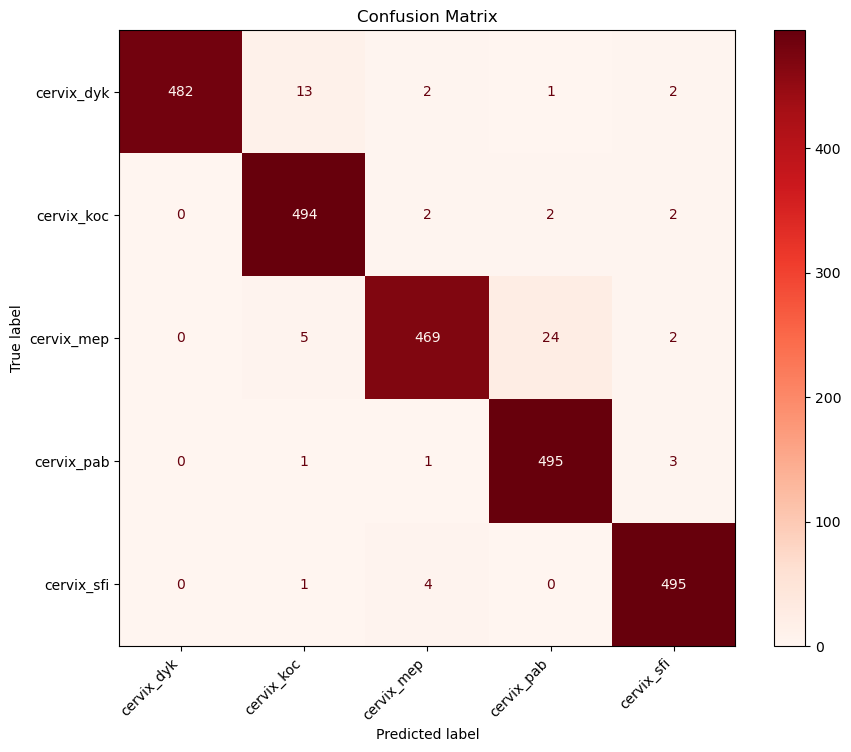

In [170]:
# This gives all the labels for from the test dataset 
true_labels = test_gen.classes

# Getting the class indices
class_indices = test_gen.class_indices

# Getting the class names from the test dataset
class_names = list(class_indices.keys())

predictions = model_initial.predict(test_gen, steps = len(test_gen), verbose = 1)

pred_labels = np.argmax(predictions, axis = 1)

# Calling the confusion matrix function from the scikit-learn library
confmat = confusion_matrix(true_labels, pred_labels)

# Visualizing the Confusion Matrix
display = ConfusionMatrixDisplay(confusion_matrix = confmat, display_labels = class_names)
fig, ax = plt.subplots(figsize=(10, 8))  
display.plot(cmap=plt.cm.Reds, ax=ax)

# Rotate the x-axis and y-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels 45 degrees
plt.yticks(rotation=0, fontsize=10)  # Keeping y labels horizontal 

# Show the plot
plt.title("Confusion Matrix")
plt.show()

If we look at the model, it performs well on both the training set and testing set based on the accuracy. While there are a few misclassifications, the correct subclass was predicted for each subclass of cervical cancer. Hyperparameter tuning will be used to minimize these misclassifications by optimizing the validation accuracy which showcases how well the model performs on unseen data. As shown in the confusion matrix, the most misclassifications can be seen with `cervix_mep` being predicted as `cervix_pab` 24 times. Also, `cervix_koc` was misclassified as `cervix_dyk` 13 times. 

Hyperparameter tuning will be used to minimize these misclassifications by optimizing the validation accuracy which showcases how well the model performs on unseen data (i.e the test data).

In [172]:
print(classification_report(true_labels, pred_labels, target_names = class_names))

              precision    recall  f1-score   support

  cervix_dyk       1.00      0.96      0.98       500
  cervix_koc       0.96      0.99      0.97       500
  cervix_mep       0.98      0.94      0.96       500
  cervix_pab       0.95      0.99      0.97       500
  cervix_sfi       0.98      0.99      0.99       500

    accuracy                           0.97      2500
   macro avg       0.97      0.97      0.97      2500
weighted avg       0.97      0.97      0.97      2500



## Step 8: Plot training and validation accuracy/loss curves to analyze model performance over epochs

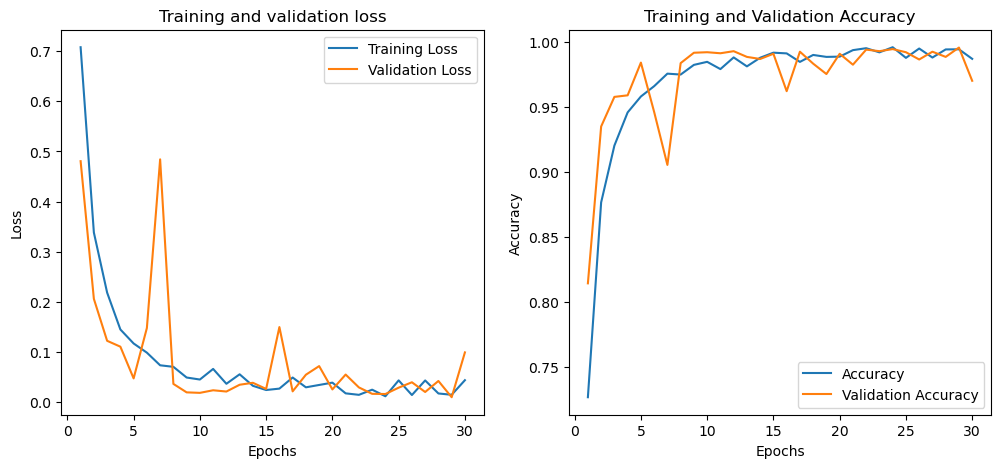

In [78]:
# Setting the size of the graphs for better visualization
plt.figure(figsize = (12, 5))

# Plotting the Loss and Validation Loss of the Initial Model
plt.subplot(1, 2, 1)
loss = history_initial.history['loss']
val_loss = history_initial.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the Accuracy and Validation Accuracy of the Initial Model
plt.subplot(1, 2, 2)
accuracy = history_initial.history['accuracy']
val_accuracy = history_initial.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label = 'Accuracy')
plt.plot(epochs, val_accuracy, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Observations and Analysis of Initial Model**

The initial model achieved a test accuracy of 0.9740 and a test loss of 0.0873. The training accuracy was 0.9939 at 30 epochs with a training loss of 0.0990. Using the elbow method, it appears that there are cases of overfitting at roughly 7-8 epochs and again at 16-17 epochs. When we evaluate future models, the epoch can be cut at around 8 epochs. By reducing the epochs, the aim is to reduce overfitting by limiting how much the model is learning from the training data. In theory, this could lead to underfitting as cutting the epochs will limit the number of complex patterns that the model learn froms the training set. However, we will see how it performs during hyperparameter tuning. 

## Step 9: Hyperparameter Tuning

Keras Tuner was used as the hyperparameter tuning method. It automatically tune the hyperparameters of the CNN model by tuning the parameters such as the number of filters, the kernel sizes, the learning rate, and the dropout rate. By doing so, I aim to find the optimal parameters of the CNN model when it comes to this particular dataset. Keras Tuner is built under the library of TensorFlow and its simply just an interface that creates a search space for the hyperparameters and it automatically explores different parameter combinations.

Hyperband is a new method for tuning iterative algorithms that is built under the Keras Tuner. It essentially performs random sampling and tries to gain an edge over other algorithms by maximizing the run-time. The goal of Hyperband is not to test every combination of hyperparameters but rather test out a random sample from them and see which ones within that sample had the best accuracy. Initially, sampled hyperparameter combinations are evaluated using a constraint of resources to maximize run-time but also to eliminate worst-performing combinations. This is done using Early Stopping and that way it saves time and discard combinations that do not optimize the accuracy or whatever metric is desired. Then it allocates more resources in later iterations to the combinations that are more promising so that only the best hyperparamaters are left and are chosen. 

**The Parameters That Will be Hyperparameter Tuned Are**:
- `Number of Filters (num_filters)`
- `Kernel Size`
- `Pool Size`
- `Dropout`
- `Learning Rate`

This means that some aspects of the CNN architecture will be kept the same as the initial model. This includes the following:
- **`Number of Conv2D Layers`:** 3
- **`Number of Pooling Layers`:** 3
- **`Activation Functions`**: All Conv2D layers will have ReLu activation function
- **`Fully Connected Layer`**: After flattening the feature maps from 3D to 2D, the fully connected layer still has 128 neurons
- **`Output Layer Activation Function`**: Softmax activation function is still used due to multi-class
- **`Optimizer`**: Kept as ADAM
- **`Loss`**: Kept as Categorical Cross Entropy function
- **`Metrics`**: Maximizing validation accuracy which will help with good classifications

No max trials were set as HyperBand only selects the most promising combinations. After running, only 26 trials were run which already took 4 hours and 45 minutes to run. 

In [147]:
def create_CNN_model(hp):
    num_filters = hp.Int('num_filters', min_value=32, max_value=128, step=32)  # Number of filters

    # Define kernel size as two separate integers for height and width
    kernel_height = hp.Int('kernel_height', min_value=3, max_value=5, step=1)
    kernel_width = hp.Int('kernel_width', min_value=3, max_value=5, step=1)
    kernel_size = (kernel_height, kernel_width)  # Combine them into a tuple

    # Define pool size as two separate integers for height and width
    pool_height = hp.Int('pool_height', min_value=2, max_value=3, step=1)
    pool_width = hp.Int('pool_width', min_value=2, max_value=3, step=1)
    pool_size = (pool_height, pool_width)  # Combine them into a tuple

    dropout = hp.Float('dropout', min_value=0.3, max_value=0.7, step=0.1)  # Dropout rate
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')  # Learning rate

    model = Sequential([
        Conv2D(num_filters, kernel_size, activation='relu', input_shape=img_shape),
        MaxPooling2D(pool_size),
        Conv2D(num_filters, kernel_size, activation='relu'),
        MaxPooling2D(pool_size),
        Conv2D(num_filters, kernel_size, activation='relu'),
        MaxPooling2D(pool_size),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout),
        Dense(5, activation='softmax') 
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    return model

In [187]:
# Initialize the tuner (Hyperband is used here)
tuner = kt.Hyperband(
    create_CNN_model,  # The function that defines your model
    objective='val_accuracy',  # Optimize for validation accuracy
    max_epochs = 8,  # Maximum number of epochs to run for each trial
    factor=3,  # Controls the amount of resource for each trial
    directory='my_dir',  # Directory where tuner results are saved
    project_name='cnn_hyperparameter_tuning',  # Name of the project (folder)
)

# Start hyperparameter search
tuner.search(train_gen, epochs= 8, validation_data=val_gen)

# Get the best model found by the tuner
best_model = tuner.get_best_models(1)[0]

Reloading Tuner from my_dir\cnn_hyperparameter_tuning\tuner0.json


C:\Users\techa\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\techa\anaconda\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


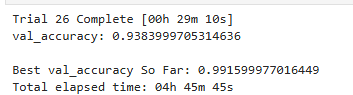

After 26 Trials, the tuner automatically stopped iterating. This makes sense as the HyperBand algorithm does not test every combination but only those that maximize our objective. The best validation accuracy achieved was 0.991599 after 26 trials and 4 hours and 45 minutes of runtime. 

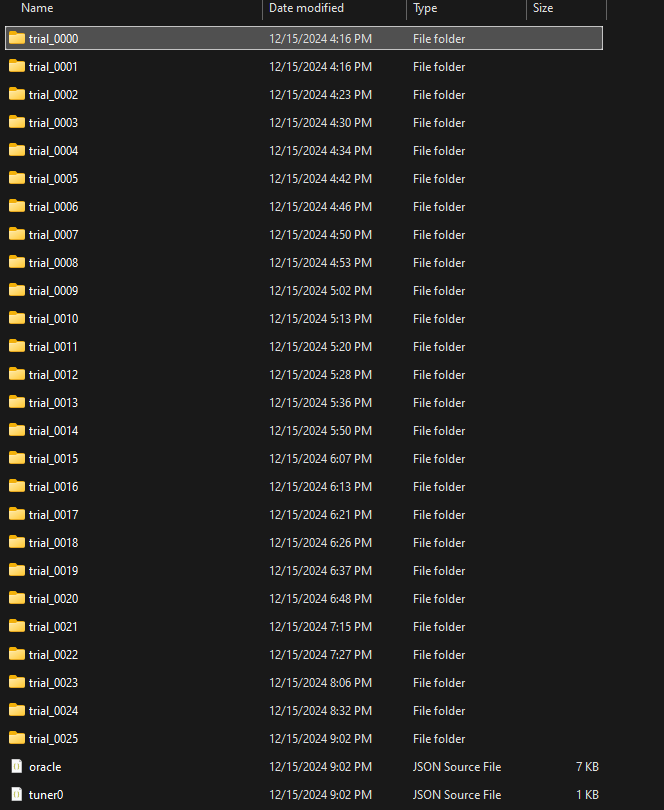

This screenshot shows all the recorded trials each stored as a JSON source file code. Each folder contains the parameters that were tested by the HyperBand algorithm. 

### Report the best combination of hyperparameters and its impact on performance.

In [200]:
# Retrieve the best trial (the one with the highest validation accuracy)
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]

# Get the hyperparameters of the best trial
best_hyperparameters = best_trial.hyperparameters

# Retrieve specific hyperparameters
num_filters = best_hyperparameters.get('num_filters')
kernel_size = (best_hyperparameters.get('kernel_height'), best_hyperparameters.get('kernel_width'))
pool_size = (best_hyperparameters.get('pool_height'), best_hyperparameters.get('pool_width'))
dropout = best_hyperparameters.get('dropout')
learning_rate = best_hyperparameters.get('learning_rate')

# Print the individual values
print(f"Best num_filters: {num_filters}")
print(f"Best kernel_size: {kernel_size}")
print(f"Best pool_size: {pool_size}")
print(f"Best dropout: {dropout}")
print(f"Best learning_rate: {learning_rate}")

Best num_filters: 64
Best kernel_size: (3, 4)
Best pool_size: (2, 3)
Best dropout: 0.4
Best learning_rate: 0.0011041348664014223


#### Plotting the loss and accuracy curves of the best model

In [238]:
history_best = best_model.fit(train_gen, epochs = 8, validation_data = val_gen)

Epoch 1/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 114s 358ms/step - accuracy: 0.9657 - loss: 0.0952 - val_accuracy: 0.9908 - val_loss: 0.0373
Epoch 2/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 111s 355ms/step - accuracy: 0.9751 - loss: 0.0755 - val_accuracy: 0.9752 - val_loss: 0.0850
Epoch 3/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 111s 353ms/step - accuracy: 0.9754 - loss: 0.0665 - val_accuracy: 0.9624 - val_loss: 0.1163
Epoch 4/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 113s 361ms/step - accuracy: 0.9822 - loss: 0.0527 - val_accuracy: 0.9928 - val_loss: 0.0223
Epoch 5/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 115s 367ms/step - accuracy: 0.9792 - loss: 0.0610 - val_accuracy: 0.9876 - val_loss: 0.0350
Epoch 6/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 113s 359ms/step - accuracy: 0.9756 - loss: 0.0768 - val_accuracy: 0.9928 - val_loss: 0.0280
Epoch 7/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 112s 358ms/step - accuracy: 0.9839 - loss: 0.0530 - val_accuracy: 0.9920 - val_loss: 0.0302
Epoch 8/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 112s 357ms/step - accuracy: 0.9819 - loss: 0

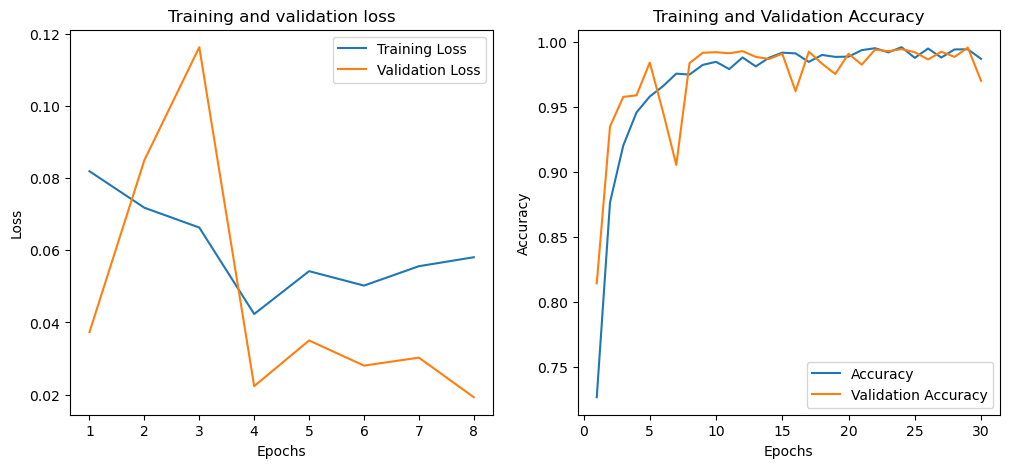

In [241]:
# Setting the size of the graphs for better visualization
plt.figure(figsize = (12, 5))

# Plotting the Loss and Validation Loss of the Initial Model
plt.subplot(1, 2, 1)
loss = history_best.history['loss']
val_loss = history_best.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the Accuracy and Validation Accuracy of the Initial Model
plt.subplot(1, 2, 2)
accuracy = history_initial.history['accuracy']
val_accuracy = history_initial.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label = 'Accuracy')
plt.plot(epochs, val_accuracy, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [176]:
best_test_loss, best_test_accuracy = best_model.evaluate(test_gen)
print(f"Test Accuracy: {best_test_accuracy:.4f}")
print(f"Test Loss: {best_test_loss:.4f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 191ms/step - accuracy: 0.9925 - loss: 0.0300
Test Accuracy: 0.9924
Test Loss: 0.0314


40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step


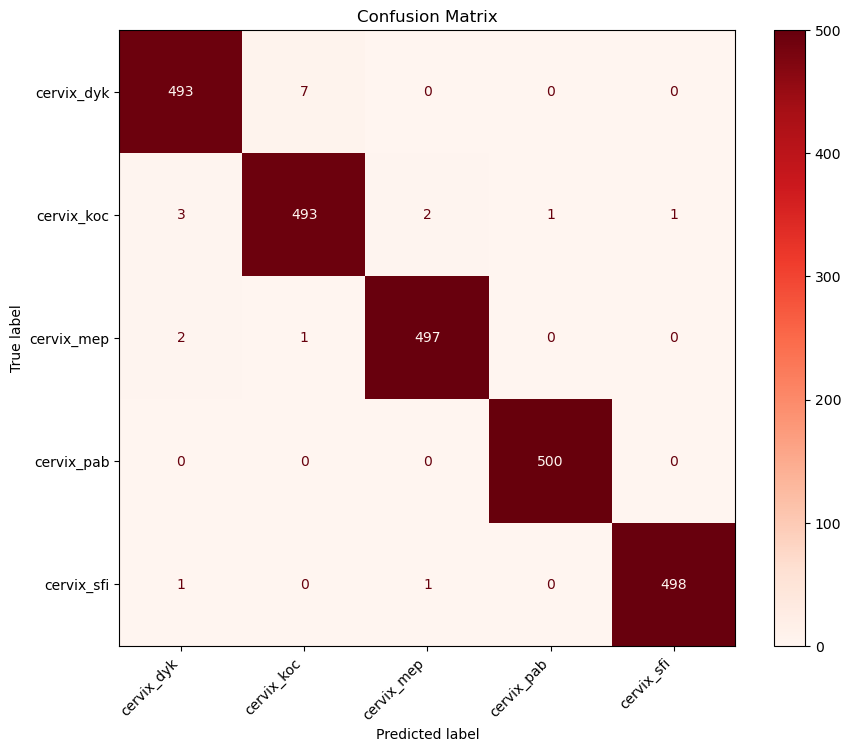

In [178]:
# This gives all the labels for from the test dataset 
true_labels = test_gen.classes

# Getting the class indices
class_indices = test_gen.class_indices

# Getting the class names from the test dataset
class_names = list(class_indices.keys())

predictions = best_model.predict(test_gen, steps = len(test_gen), verbose = 1)

pred_labels = np.argmax(predictions, axis = 1)

# Calling the confusion matrix function from the scikit-learn library
confmat = confusion_matrix(true_labels, pred_labels)

# Visualizing the Confusion Matrix
display = ConfusionMatrixDisplay(confusion_matrix = confmat, display_labels = class_names)
fig, ax = plt.subplots(figsize=(10, 8))  
display.plot(cmap=plt.cm.Reds, ax=ax)

# Rotate the x-axis and y-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels 45 degrees
plt.yticks(rotation=0, fontsize=10)  # Keeping y labels horizontal 

# Show the plot
plt.title("Confusion Matrix")
plt.show()

## Summary of this Project

### Goal and Motivation

The dataset chosen was from Kaggle titled 'Multi Cancer Dataset' that was published by contributor Obuli Sai Naren in 2024. Link to dataset: https://www.kaggle.com/datasets/obulisainaren/multi-cancer/data 

To classify five different subclasses of cervical cancer as cervical cancer is a growing health problem in America. The five subclasses of cancer are:
- `cancer_dyk` = **Dyskeratotic**: If there are Dyskeratotic cancer cells in a pap smear test, it usually indicates signs of precancerous or cancerous cells in the cervix as it is abnormal cell growth. 
- `cancer_koc` = **Koilcytotic**: Koilocytotic refers to when there are koilocytes presence within the cervix which is indicative of the human papillomavirus (HPV). When left untreated, these cells can lead to malignant tumors. 
- `cancer_pab` = **Parabasal**: These are immature cells in the cervix that are usually found in patients with low estrogen levels. They can become cancer. 
- `cancer_mep` = **Metaplastic**: Otherwise known as Squamous Metaplasia, it indicates a precancerous change in the cells that make up the tissue lining in the cervix. 
- `cancer_sfi` = **Superficial-Intermediate**: This indicates more mature squamous metaplasia cells which can lead to cancer.

Purpose was to select the best CNN architecture with the best accuracy to avoid misclassifications as misclassifying what kind of cervical cancer problem they have can be costly towards their health and their financial situation. Hence, classifying the cancer classes correctly will allow patients to recieve the optimal treatment for their condition. 

### Preprocessing Procedure

25,000 total images of cervical cancer was imported onto the local computer using the os and shutil packages. Each cancer subclass has 5000 images and then the images within the folders are transformed into a dataframe with a filepath column and a label column. Dataset is already balanced as each type has the same number of images and so oversampling and undersampling were avoided. No missing values and everything was read onto the dataset correctly. Sample images of each cancer type were shown to show the differences between the types. 

Images were then changed to a uniform size of 128 x 128 and then converted to RGB format using the Image function from the PILLOW package. RGB format has three colors and therefore three channels. All images were validated and so they were all good to use. This was done using the ImageDataGenerator() function in the PILLOW package again. The dataset is then split with a 80/10/10 split, training has 20,000 images, testing and validation has 2500 images each. 

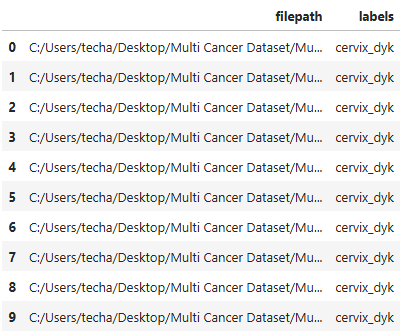

The dataframe looked like this where it links the filepath to the images and the labels is meant for classifying which ones belonged to which. 

### Base Model CNN Architecture

1. **Convolutional Layers (3 Layers)**:
32 filter -> 64 Filters -> 128 Filters with the goal of extracting low-level features (edges, corners, textures, etc) and then higher-level features like shapes or parts in the image. Each Conv2D layer uses a ReLu activation function. 

2. **Max Pooling Layers (3 layers) with pool size (2 x 2)**:
Helped to reduce the spatial dimensions of the feature map and downscales them which reduces computation cost and overfitting. Pool size of 2 x 2 was used as opposed to 3 x 3 to ensure that resulting matrix keeps more data.

3. **Fully Connected Layer (128 neurons)**:
A dense layer with 128 neurons for each feature extracted from the pooling layers. Dropout layer is used to further prevent overfitting.

4. **Output Layer (5 neurons)**:
Softmax activation function is used for the 5 subclasses of cervical cancer in the dataset.

5. **Compilation**: ADAM optimizer with learning rate of 0.001 with Categorical Cross Entropy Loss and Accuracy as the metrics

### Hyperpameter Tuning 

The initial model was improved through hyperparameter tuning so that the accuracy of classifications can be improved. This was done using the Keras Tuner and Hyperbad Iterative Algorithm. The hyperparameter tuning process was run for 4 hours and 45 minutes. Optimizing the following parameters:

**The Parameters That Will be Hyperparameter Tuned Are**:
- `Number of Filters (num_filters)`
- `Kernel Size`
- `Pool Size`
- `Dropout`
- `Learning Rate`

This means that some aspects of the CNN architecture will be kept the same as the initial model. This includes the following:
- **`Number of Conv2D Layers`:** 3
- **`Number of Pooling Layers`:** 3
- **`Activation Functions`**: All Conv2D layers will have ReLu activation function
- **`Fully Connected Layer`**: After flattening the feature maps from 3D to 2D, the fully connected layer still has 128 neurons
- **`Output Layer Activation Function`**: Softmax activation function is still used due to multi-class
- **`Optimizer`**: Kept as ADAM
- **`Loss`**: Kept as Categorical Cross Entropy function
- **`Metrics`**: Maximizing validation accuracy which will help with good classific

### After Hyperparameter Tuning
**The Best Hyperparameters in terms of Validation Accuracy (and later test accuracy) are**:
- **`Number of Filters (num_filters)`:** 64
- **`Kernel Size:`** (3, 4)
- **`Pool Size:`** (2, 3)
- **`Dropout:`** 0.5
- **`Learning Rate:`** 0.0011041348664014223

### Best Model CNN Architecture

1. **Conv2D Layer 1:** 64 filters, Kernel Size (3, 4), ReLu function
3. **Max Pooling Layer 1 Pool Size:** (2, 3)
5. **Conv2D Layer 2:** 64 filters, Kernel Size (3, 4), ReLu function
6. **Max Pooling Layer 2 Pool Size:** (2, 3)
7. **Conv2D Layer 3:** 64 filters, Kernel Size (3, 4), ReLu function
8. **Max Pooling Layer 3 Pool Size:** (2, 3)
9. **Flatten Layer**
10. **Dense Layer**: 128 neurons, ReLu function 
11. **Dropout Layer**: Dropout rate = 0.4
12. **Output Layer**: 1 neuron, softmax function for multi-class classification

- **`Optimizer`**: Adam with Learning rate = 0.0011041348664014223
- **`Loss`**: Categorical Cross-entropy
- **`Metrics`**: Accuracy

### Comparison of Initial Model vs Best Model

**Initial Model Test Loss**: 0.0873

**Initial Model Test Accuracy**: 0.9740

**Initial Model Accuracy and Loss Curves**:
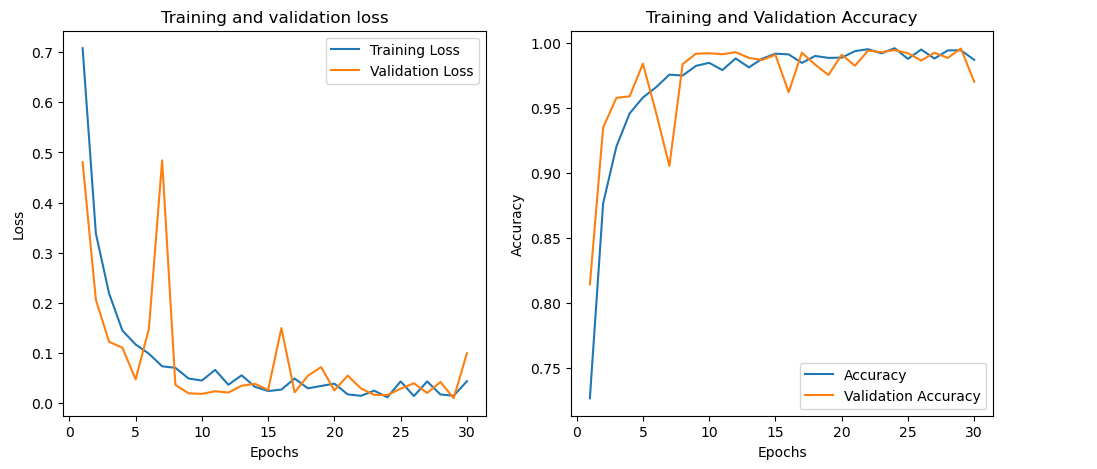

**Initial Model Confusion Matrix**:
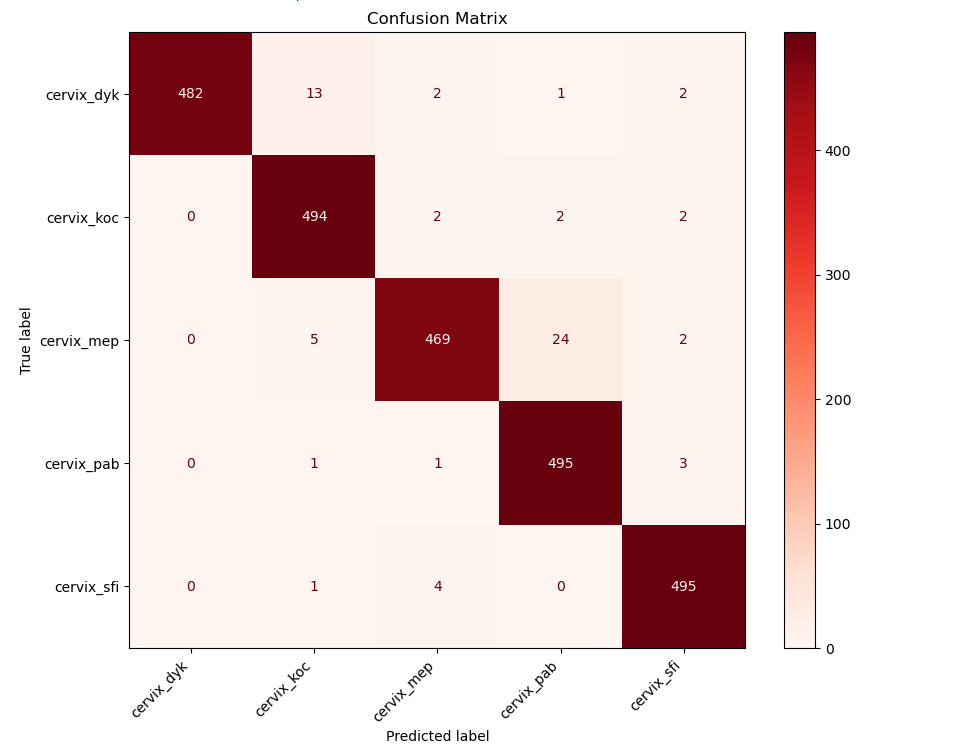

**Best Model Test Loss**: 0.0314

**Best Model Test Accuracy**: 0.9924

**Best Model Accuracy and Loss Curves**:
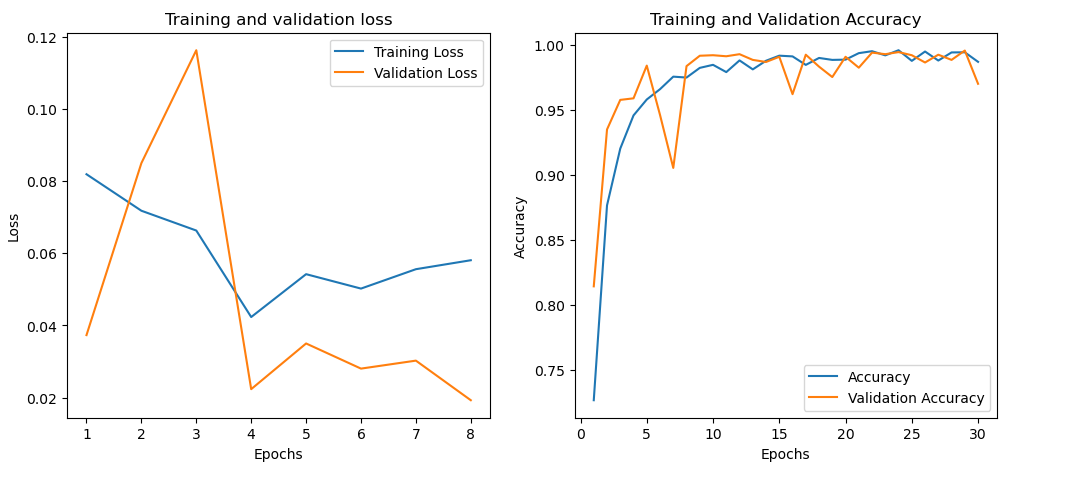

**Best Model Confusion Matrix**:
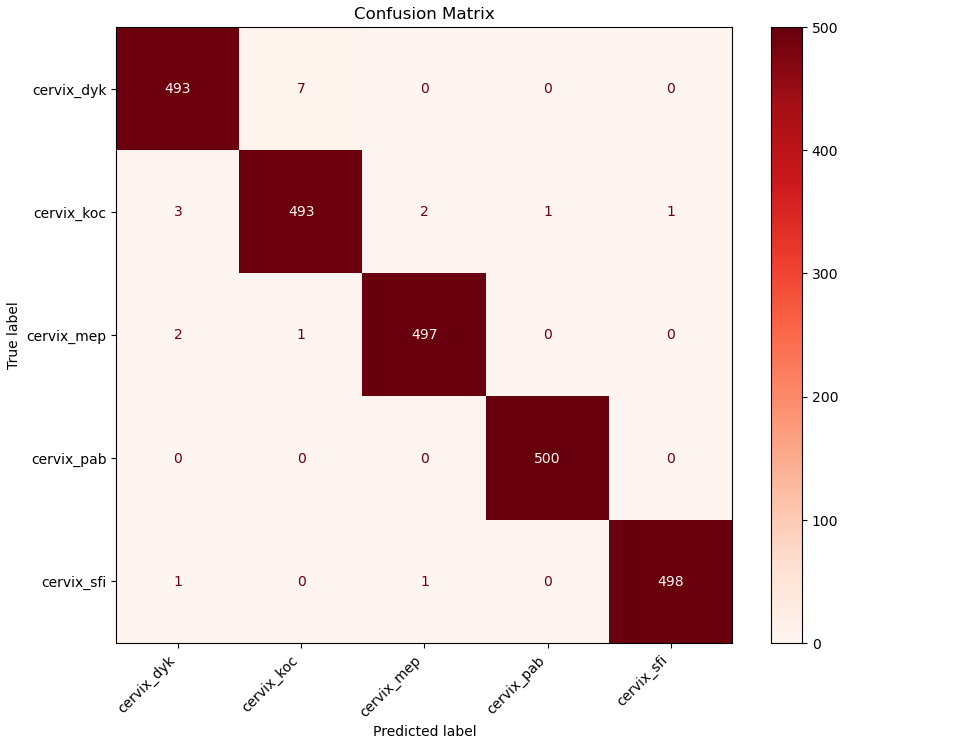

We can see that overall with hyperparameter tuning the base model was improved upon in terms of accuracy. The accuracy went from 0.9740 to 0.9924. The confusion matrix is improved upon with much less misclassifications. Despite the time constraint, the hyperparameter tuning process was a success in terms of the constraints that were set. If more time was permited, perhaps there would be zero misclassifications.

The challenges faced for this are mainly associated with the computation cost due to how long the parameters take to test out different combinations. Overall, the findings of this project have shown that CNN can be used to classify cervical cancer types and correctly identify what subclass of cervical cancer. This is very important in terms of reccomending the most optimal treatments for patients depending on the type of cancer they have.    

### Bonus: Correctly Classified Images

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Correctly and Incorrectly Classified Images


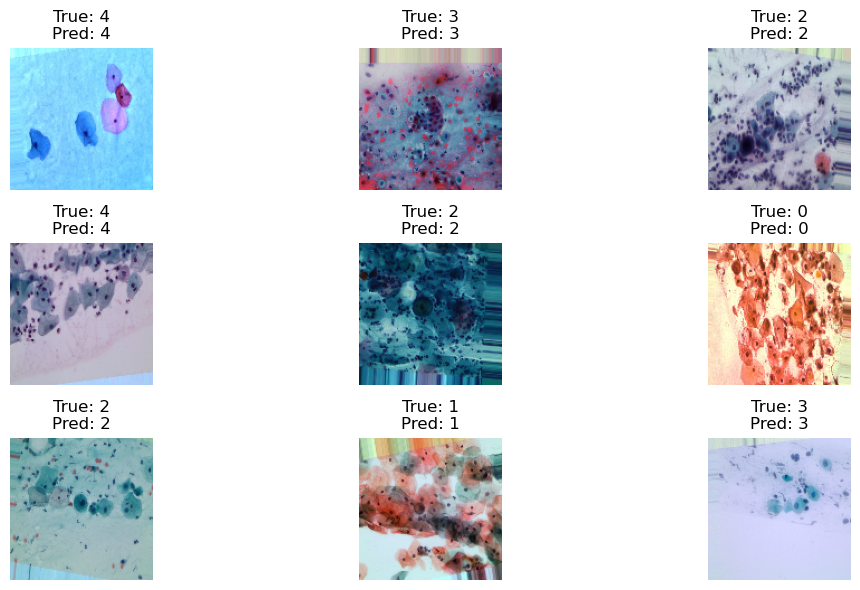

In [318]:
# Function to plot images (limits the number of images displayed)
def plot_images(images, labels, predictions=None, num_images=9):
    plt.figure(figsize=(12, 6))
    for i, (img, label, pred) in enumerate(zip(images, labels, predictions)):
        if i >= num_images:  # Stop after num_images
            break
        plt.subplot(3, 3, i + 1)  # 3x3 grid for 9 images
        plt.imshow(img)  # Display the image
        plt.title(f"True: {label}\nPred: {pred}")  # True label and predicted label
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Prepare lists to store correct and incorrect images (limited to 5 correct and 4 incorrect)
correct_images = []
incorrect_images = []
correct_labels = []
incorrect_labels = []
correct_preds = []
incorrect_preds = []

# Iterate over the test generator
for images, labels in test_gen:
    # Make predictions for the batch
    predictions = best_model.predict(images)
    
    # Convert one-hot encoded labels to integer class labels
    predicted_classes = np.argmax(predictions, axis=1)  # Get predicted class (argmax of softmax output)
    true_classes = np.argmax(labels, axis=1) 
    
    # Identify correct and incorrect predictions
    correct_mask = predicted_classes == true_classes
    incorrect_mask = predicted_classes != true_classes
    
    # Store the first 5 correct and 4 incorrect images
    correct_images.extend(images[correct_mask][:5])  # Limit to 5 correct
    incorrect_images.extend(images[incorrect_mask][:4])  # Limit to 4 incorrect
    correct_labels.extend(true_classes[correct_mask][:5])  # Limit to 5 correct
    incorrect_labels.extend(true_classes[incorrect_mask][:4])  # Limit to 4 incorrect
    correct_preds.extend(predicted_classes[correct_mask][:5])  # Limit to 5 correct
    incorrect_preds.extend(predicted_classes[incorrect_mask][:4])  # Limit to 4 incorrect
    
    # Break after collecting enough images (5 correct and 4 incorrect)
    if len(correct_images) >= 5 and len(incorrect_images) >= 4:
        break

# Combine the correct and incorrect images for plotting
all_images = np.concatenate([correct_images, incorrect_images])
all_labels = np.concatenate([correct_labels, incorrect_labels])
all_preds = np.concatenate([correct_preds, incorrect_preds])

# Plot the correctly and incorrectly classified images
print("Correctly and Incorrectly Classified Images")
plot_images(all_images, all_labels, all_preds, num_images=9)